In [ ]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# URL de tu base de datos en Firebase
firebase_url = "https://sensortempv1-default-rtdb.firebaseio.com/sensor.json"

# Función para obtener el dato desde Firebase
def get_firebase_data():
    response = requests.get(firebase_url)
    data = response.json()
    return float(data)  # Convertir el valor a flotante

# Función para graficar el dato en tiempo real
def animate(i):
    # Obtener el dato desde Firebase
    value = get_firebase_data()

    # Crear un DataFrame de Pandas con el valor
    df = pd.DataFrame({'Value': [value]})

    # Limpiar la figura y graficar el dato
    plt.clf()
    plt.plot(df['Value'])
    plt.xlabel('Tiempo')
    plt.ylabel('Valor')
    plt.title('Gráfico de Dato en Tiempo Real desde Firebase')

# Crear la animación y actualizar cada 1 segundo
ani = FuncAnimation(plt.gcf(), animate, interval=5000, cache_frame_data=False)

# Mostrar el gráfico en tiempo real
plt.show()



In [ ]:
import serial

# Configurar la conexión con el puerto serial
ser = serial.Serial("COM4",9600)  # Reemplaza 'COM4' con el puerto COM correcto en tu sistema
ser.baudrate = 9600  # Configura la velocidad de transmisión (baudrate) según corresponda

try:
    while True:
        data_received = ser.readline().decode().strip()
        if data_received:
            print("Dato recibido:", data_received)

except KeyboardInterrupt:
    print("Programa detenido por el usuario")

finally:
    # Cierra la conexión con el puerto serial al finalizar
    ser.close()



In [ ]:
import serial
import matplotlib.pyplot as plt

# Configurar la conexión con el puerto serial
ser = serial.Serial('COM4', 9600)  # Reemplaza 'COM4' con el puerto COM correcto en tu sistema
ser.baudrate = 9600  # Configura la velocidad de transmisión (baudrate) según corresponda

# Listas para almacenar los datos del ADC y el voltaje
adc_values = []
voltages = []

# Función para actualizar la gráfica
def update_plot(i):
    if ser.in_waiting:
        data_received = ser.readline().decode().strip()
        adc_value, voltage = data_received.split(',')
        adc_values.append(int(adc_value))
        voltages.append(float(voltage))

        plt.cla()
        plt.plot(adc_values, label='ADC Value')
        plt.plot(voltages, label='Voltage (V)')
        plt.xlabel('Muestras')
        plt.ylabel('Valor del ADC / Voltaje (V)')
        plt.legend()
        plt.tight_layout()

# Configurar la gráfica
plt.ion()
fig = plt.figure()
ani = fig.canvas.new_timer(interval=1000)
ani.add_callback(update_plot)
ani.start()

# Mantener la gráfica abierta
plt.show()

3.220238
3.220238


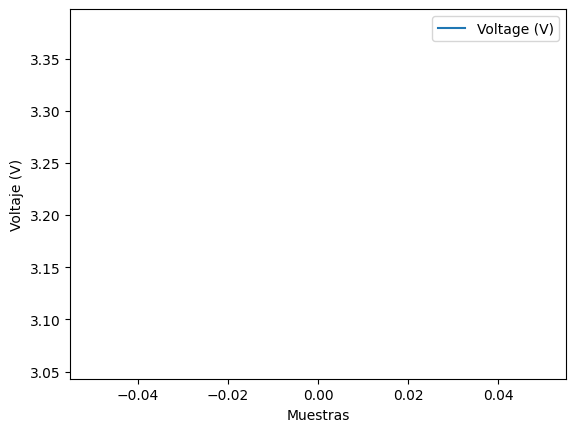

3.220238
3.220238
3.221044
3.221044
3.213793
3.213793
3.223461
3.223461
3.221044
3.221044
3.218627
3.218627
3.220238
3.220238
3.220238
3.220238
3.217015
3.217015
3.221044
3.221044
3.220238
3.220238
3.220238
3.220238
3.219432
3.219432
3.222655
3.222655
3.224266
3.224266
3.221044
3.221044
3.219432
3.219432
3.221849
3.221849
3.220238
3.220238
3.223461
3.223461
3.220238
3.220238
3.220238
3.220238
3.219432
3.219432
3.218627
3.218627
3.220238
3.220238
3.220238
3.220238
3.221044
3.221044
3.220238
3.220238
3.221044
3.221044
3.220238
3.220238
3.221044
3.221044
3.221044
3.221044
3.219432
3.219432
3.223461
3.223461
3.217821
3.217821
3.223461
3.223461
3.217015
3.217015
3.221044
3.221044
3.218627
3.218627
3.220238
3.220238
3.220238
3.220238
3.224266
3.224266
3.230712
3.230712
3.221849
3.221849
3.221849
3.221849
3.21621
3.21621
3.219432
3.219432
3.219432
3.219432
3.217821
3.217821
3.221849
3.221849
3.224266
3.224266
3.217821
3.217821
3.219432
3.219432
3.219432
3.219432
3.220238
3.220238
3.220238
3.2

In [16]:
import serial
import matplotlib.pyplot as plt

# Configurar la conexión con el puerto serial
ser = serial.Serial("COM4", 9600)  # Reemplaza 'COM4' con el puerto COM correcto en tu sistema
ser.baudrate = 9600  # Configura la velocidad de transmisión (baudrate) según corresponda

# Listas para almacenar los datos del ADC y el voltaje
voltages = []

try:
    plt.ion()  # Modo interactivo para actualizar la gráfica en tiempo real

    # Configurar la gráfica
    fig, ax = plt.subplots()
    line_voltage, = ax.plot([], [], label='Voltage (V)')
    ax.set_xlabel('Muestras')
    ax.set_ylabel('Voltaje (V)')
    ax.legend()

    while True:
        data_received = ser.readline().decode().strip()
        if data_received:
            voltage = data_received
            print(voltage)
            voltages.append(float(voltage))
            print(voltage)
            # Actualizar la gráfica con los nuevos datos
            line_voltage.set_data(range(len(voltages)), voltages)
            ax.relim()
            ax.autoscale_view()

            plt.pause(0.1)  # Pausa para actualizar la gráfica y permitir que se muestre

except KeyboardInterrupt:
    print("Programa detenido por el usuario")

finally:
    # Cierra la conexión con el puerto serial al finalizar
    ser.close()


